<a href="https://colab.research.google.com/github/laythamra28/DeepLearning-Project/blob/main/Alex%2BResnet%2BPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import numpy as np
import torch
import torch.nn as nn
import seaborn as sns
import time

In [ ]:
%cd drive/Shareddrives/'BE 500'/Dataset

/content/drive/Shareddrives/BE 500/Dataset


##[1] Preprocessing 

In [ ]:
#create X and Y vector
X=np.zeros((1000,480,640))
Y=np.zeros((1,1000))

In [ ]:
#Loop through files and save each image into the matrix with labels Y vector
filenames=os.listdir()
for i in range(len(filenames))
  X[i,:,:] = mpimg.imread(filenames[i])
  if filenames[i][0]=='S':
    Y[0,i] = 1

In [ ]:
%cd ..

/content/drive/Shareddrives/BE 500


## [2] Split into Test/Val/Train

In [ ]:
import sklearn.model_selection
#Split into train and test test
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y.T, test_size=0.10, random_state=1)

X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X_train, y_train, test_size=150/900, random_state=1)

In [ ]:
#Save variables for train,val, and test
np.save('X_train',X_train)
np.save('X_val',X_val)
np.save('X_test',X_test)

np.save('y_train',y_train)
np.save('y_val',y_val)
np.save('y_test',y_test)

## Start from Here

In [ ]:
#load in training variables and testing variables
X_train=np.load('X_train.npy')
y_train=np.load('y_train.npy')
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)

X_val = np.load('X_val.npy')
y_val = np.load('y_val.npy')
X_val = X_val.astype(np.float32)
y_val = y_val.astype(np.float32)

X_test=np.load('X_test.npy')
y_test=np.load('y_test.npy')
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)

In [ ]:
#Combine X_test and X_val
X_test_val=np.concatenate((X_val,X_test))
X_test_val=torch.from_numpy(X_test_val)
X_test_val=X_test_val.reshape((250,1,480,640))

#Combine y_test and y_val
y_test_val=np.concatenate((y_val,y_test))
y_test_val=torch.from_numpy(y_test_val)


In [ ]:
#Normalize data
X_train=X_train/255
X_test_val=X_test_val/255

In [ ]:
#Reshape Xtrain
Xtrain=torch.from_numpy(X_train)
Xtrain=Xtrain.reshape((750,1,480,640))

#Reshape X test
Xtest=torch.from_numpy(X_test)
Xtest=Xtest.reshape((100,1,480,640))

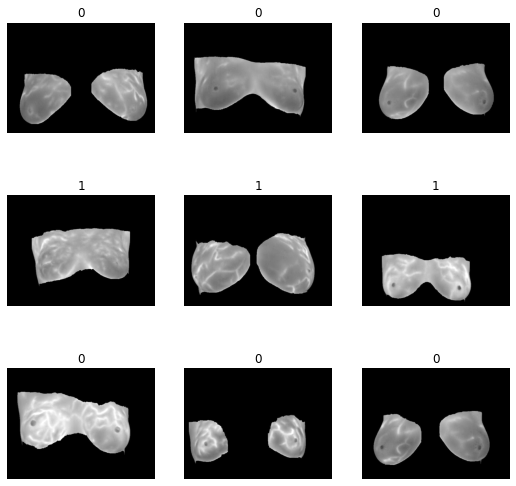

In [ ]:
#Print out the first 9 images in training set and their labels
fig, ax = plt.subplots(3, 3,figsize=(9,9))
for i in range(9):
  im=X_train[i,:,:]
  ax[i//3,i%3].imshow(im,cmap='gray')
  ax[i//3, i%3].set_title(int(y_train[i][0]))
  ax[i//3,i%3].axis('off')

## [3] Build Neural Network

In [ ]:
class AlexNet(torch.nn.Module):

  def __init__(self) -> None:
    super().__init__()
    #First Conv + relu
    self.conv1= torch.nn.Conv2d(1,96,11,4)
    self.relu1=torch.nn.ReLU()

    #First Maxpool 
    self.maxpool=torch.nn.MaxPool2d(3,2)

    #Second conv + relu
    self.conv2=torch.nn.Conv2d(96,256,5,1,padding='same')
    self.relu2=torch.nn.ReLU()

    #Second Maxpool
    self.maxpool2=torch.nn.MaxPool2d(3,2)

    #Third conv + relu
    self.conv3=torch.nn.Conv2d(256,384,3,padding="same")
    self.relu3=torch.nn.ReLU()

    #Fourth conv + relu
    self.conv4=torch.nn.Conv2d(384,384,3,padding="same")
    self.relu4=torch.nn.ReLU()

    #Fifth conv + relu
    self.conv5=torch.nn.Conv2d(384,256,3,padding="same")
    self.relu5=torch.nn.ReLU()

    #Third Maxpool
    self.maxpool3=torch.nn.MaxPool2d(3,2)

    #Flatten
    self.flatten=torch.nn.Flatten()

    #Linear 1 + relu
    self.Linear=torch.nn.Linear(59904,4096)
    self.relu6=torch.nn.ReLU()
    #Linear 2 + relu
    self.Linear2=torch.nn.Linear(4096,4096)
    self.relu7=torch.nn.ReLU()
    #Linear 3 + relu
    self.Linear3=torch.nn.Linear(4096,4096)
    self.relu8=torch.nn.ReLU()
    #Linear 4 + sigmoid
    self.Linear4=torch.nn.Linear(4096,1)
    self.sigmoid=nn.Sigmoid()


  def forward(self,x):
    #First Conv + relu
    out=self.conv1(x)
    out=self.relu1(out)

    #First maxpool
    out=self.maxpool(out)

    #Second Conv + relu
    out=self.conv2(out)
    out=self.relu2(out)

    #Second maxpool
    out=self.maxpool2(out)

    #Third conv + relu
    out=self.conv3(out)
    out=self.relu3(out)

    #Fourth conv + relu
    out=self.conv4(out)
    out=self.relu4(out)

    #Fifth conv + relu
    out=self.conv5(out)
    out=self.relu5(out)

    #Third maxpool
    out=self.maxpool3(out)

    #Flatten
    out=self.flatten(out)

    #First Linear + relu
    out=self.Linear(out)
    out=self.relu6(out)

    #Second Linear + relu
    out=self.Linear2(out)
    out=self.relu7(out)

    #Third Linear + relu
    out=self.Linear3(out)
    out=self.relu8(out)

    #Fourth Linear + sigmoid
    out=self.Linear4(out)
    out=self.sigmoid(out)

    return out


In [ ]:
#Use GPU if avaliable
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# #Reshape X train and put it on GPU
# Xtrain=Xtrain.to(device)
# Xtest=Xtest.to(device)
# X_test_val=X_test_val.to(device)

# #Put Ytrain on GPU
# ytrain=torch.from_numpy(y_train)
# ytrain=ytrain.to(device)

In [ ]:
#Initialize model,loss, and optimizer
torch.manual_seed(0)
m=AlexNet()
m=m.to(device)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(m.parameters(), lr = .000001)

NameError: ignored

In [ ]:
ytrain=torch.from_numpy(y_train)

In [ ]:
from torch.utils.data import DataLoader,TensorDataset, random_split

In [ ]:
#Create Dataset
dataset = TensorDataset(Xtrain, ytrain)
trainloader=DataLoader(dataset=dataset,batch_size=64)

In [ ]:
ytrain.shape

torch.Size([750, 1])

## [4] Train Model

In [ ]:
lossy=np.zeros(100)
start_time=time.time()
for epoch in range(100):
  for x,y in trainloader:
    x=x.to(device)
    y=y.to(device)

    pred_y = m(x)
 
    # Compute and print loss
    loss = criterion(pred_y, y)
    lossy[epoch]=loss
 
    # Zero gradients, perform a backward pass,
    # and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    del x
    del y
    torch.cuda.empty_cache()

   
  print('epoch {}: loss = {}'.format(epoch,loss.item()))

print(f'Training Time = {time.time()-start_time}')

epoch 0: loss = 0.6502150893211365
epoch 1: loss = 0.600555956363678
epoch 2: loss = 0.5551531314849854
epoch 3: loss = 0.507972002029419
epoch 4: loss = 0.4596719443798065
epoch 5: loss = 0.41161346435546875
epoch 6: loss = 0.36573055386543274
epoch 7: loss = 0.32314541935920715
epoch 8: loss = 0.28494709730148315
epoch 9: loss = 0.25213539600372314
epoch 10: loss = 0.22354534268379211
epoch 11: loss = 0.19879364967346191
epoch 12: loss = 0.17616742849349976
epoch 13: loss = 0.15530820190906525
epoch 14: loss = 0.13594716787338257
epoch 15: loss = 0.11848899722099304
epoch 16: loss = 0.10266187787055969
epoch 17: loss = 0.08880140632390976
epoch 18: loss = 0.07673630863428116
epoch 19: loss = 0.06642293184995651
epoch 20: loss = 0.057533830404281616
epoch 21: loss = 0.05020994693040848
epoch 22: loss = 0.04368515685200691
epoch 23: loss = 0.03810867667198181
epoch 24: loss = 0.03320218250155449
epoch 25: loss = 0.028977565467357635
epoch 26: loss = 0.025236481800675392
epoch 27: loss 

In [ ]:
sns.set(font='Franklin Gothic Book',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})

sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":18})

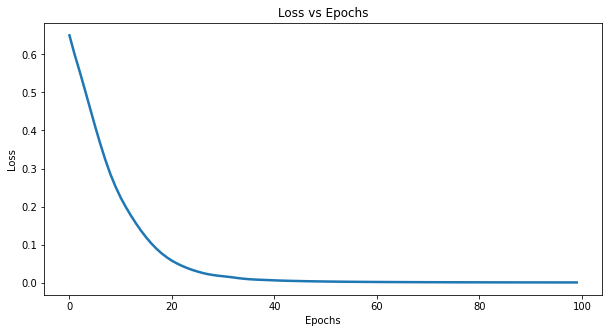

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.lineplot(data=lossy,palette='deep',linewidth=2.5)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

In [ ]:
np.save('Alexnet_loss',lossy)

In [ ]:
with torch.no_grad():
    z = m(X_test_val.to(device))


In [ ]:
y_pred=z.round()
del z

In [ ]:
ypred=y_pred.cpu().detach().numpy()

In [ ]:
ypred.shape

(250, 1)

In [ ]:
y_test_val=y_test_val.cpu().detach().numpy()

In [ ]:
acc=sum(ypred==y_test_val)/len(y_test_val)
acc=acc[0]
print(f'Accuracy = {acc*100}%')

Accuracy = 94.8%


## [5] Looking at some of the misclassified images

In [ ]:
missclass=np.where(y_test_val!=ypred)[0]

In [ ]:
missclass

array([  2,  85,  86,  91,  92, 114, 152, 168, 180, 200, 239, 240, 246])

In [ ]:
X_test_val[0,:,:,:].shape

torch.Size([1, 480, 640])

In [ ]:
1%5

1

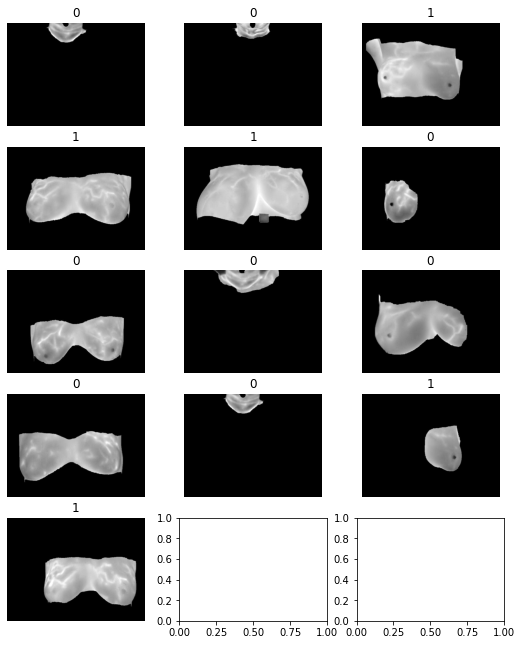

In [ ]:
fig, ax = plt.subplots(5, 3,figsize=(9,11))
for i in range(len(missclass)):
      im = X_test_val[missclass[i],:,:].reshape((480,640))
      ax[i//3,i%3].imshow(im,cmap='gray')
      ax[i//3,i%3].set_title(int(y_test_val[missclass[i]][0]))
      ax[i//3,i%3].axis('off')


What could be some of the reasons these were misclassified?

## Confusion Matrix - False Positives vs False Negatives

## ResNet Implementation

In [ ]:
import torch
from torchvision.models import resnet18
import torchvision

net = resnet18(pretrained=False) # You should put 'True' here 
net.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3,bias=False)

net.fc = nn.Sequential(
    nn.Linear(512 * torchvision.models.resnet.BasicBlock.expansion,1),
    nn.Sigmoid()
    )



/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
torch.manual_seed(0)
net=net.to(device)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr = .000001)

In [ ]:
lossy=np.zeros(100)
for epoch in range(100):
  for x,y in trainloader:
    x=x.to(device)
    y=y.to(device)
    pred_y = net(x)
 
    # Compute and print loss
    loss = criterion(pred_y, y)
    lossy[epoch]=loss
 
    # Zero gradients, perform a backward pass,
    # and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    

  print('epoch {}: loss = {}'.format(epoch,loss.item()))

epoch 0: loss = 0.7556147575378418
epoch 1: loss = 0.7410521507263184
epoch 2: loss = 0.7278013229370117
epoch 3: loss = 0.7157889604568481
epoch 4: loss = 0.7047688961029053
epoch 5: loss = 0.6945646405220032
epoch 6: loss = 0.6851382851600647
epoch 7: loss = 0.676356852054596
epoch 8: loss = 0.6681510210037231
epoch 9: loss = 0.6604427695274353
epoch 10: loss = 0.6531375646591187
epoch 11: loss = 0.6461817622184753
epoch 12: loss = 0.6395208239555359
epoch 13: loss = 0.6331284046173096
epoch 14: loss = 0.6269879341125488
epoch 15: loss = 0.6210847496986389
epoch 16: loss = 0.6154232621192932
epoch 17: loss = 0.6100050210952759
epoch 18: loss = 0.6048160195350647
epoch 19: loss = 0.5998615622520447
epoch 20: loss = 0.595130205154419
epoch 21: loss = 0.5906233787536621
epoch 22: loss = 0.5863171815872192
epoch 23: loss = 0.5821905136108398
epoch 24: loss = 0.5782173275947571
epoch 25: loss = 0.574363648891449
epoch 26: loss = 0.5706075429916382
epoch 27: loss = 0.5669177174568176
epoch

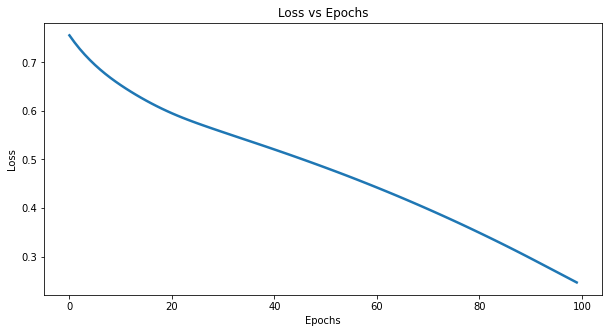

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.lineplot(data=lossy,palette='deep',linewidth=2.5)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()


In [ ]:
with torch.no_grad():
    z = net(X_test_val.to(device))

y_pred=z.round()
del z

ypred=y_pred.cpu().detach().numpy()
y_test_val=y_test_val.cpu().detach().numpy()

acc=sum(ypred==y_test_val)/len(y_test_val)
acc=acc[0]
print(f'Accuracy = {acc*100}%')

Accuracy = 83.6%


In [ ]:
missclass=np.where(y_test_val!=ypred)[0]

IndexError: ignored

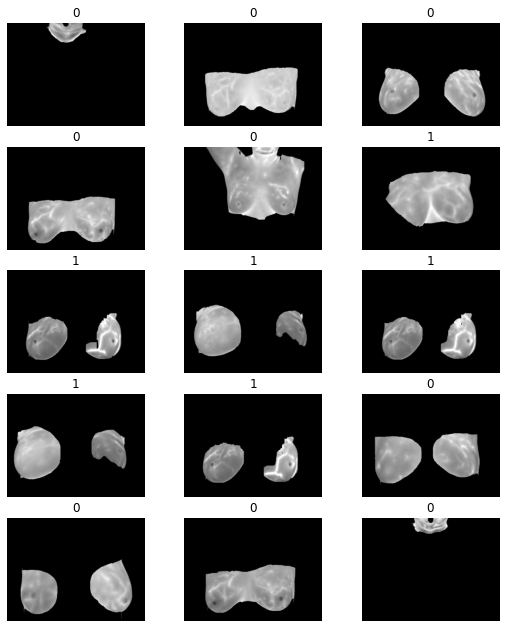

In [ ]:
fig, ax = plt.subplots(5, 3,figsize=(9,11))
for i in range(len(missclass)):
      im = X_test_val[missclass[i],:,:].reshape((480,640))
      ax[i//3,i%3].imshow(im,cmap='gray')
      ax[i//3,i%3].set_title(int(y_test_val[missclass[i]][0]))
      ax[i//3,i%3].axis('off')

In [ ]:
np.save('Resnet_Loss',lossy)

In [ ]:
!jupyter nbconvert --to html "Alex+Resnet+Preprocessing.ipynb"

[NbConvertApp] WARNING | pattern 'Alex+Resnet+Preprocessing.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]